# Convolutional Autoencoder


In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from scipy.misc import imsave
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16|
import collections
import time
import math

/usr/home/hao/miniconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Checkpoint 1
# Load Parameters of individual ITCNets

In [2]:
# 1f - 3f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/1to3_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    
    Au1w1 = loaded_graph.get_tensor_by_name('conv_layers/conv_weights_1:0').eval()
    Au1b1 = loaded_graph.get_tensor_by_name('conv_layers/bias_1:0').eval()
    Au1w2 = loaded_graph.get_tensor_by_name('conv_layers/conv_weights_2:0').eval()
    Au1b2 = loaded_graph.get_tensor_by_name('conv_layers/bias_2:0').eval()
    Au1w3 = loaded_graph.get_tensor_by_name('conv_layers/conv_weights_3:0').eval()
    Au1b3 = loaded_graph.get_tensor_by_name('conv_layers/bias_3:0').eval()
    Au1deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au1deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/1to3_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [3]:
# 3f - 5f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    
    Au2deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au2deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [4]:
# 5f - 8f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/5to8_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    
    Au3deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au3deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/5to8_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [5]:
# 8f - 10f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/8to10_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au4deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au4deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/8to10_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [6]:
# 10f - 13f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au5deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au5deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [7]:
# 13f - 15f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/13to15_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au6deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au6deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/13to15_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [8]:
# 15f - 18f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/15to18_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au7deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au7deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()
    # Val X1
# val_x = gallery_full[2500:, 0]
# val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# # Val Y
# val_y = gallery_full[2500:, 3]
# val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
# print('val_x', val_x.shape, 'valsave_decoded_y', val_y.shape)
# me('deconv_layers/debias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/15to18_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [9]:
# 18f - 20f
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au8deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au8deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()
#     Au3deW2 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_2:0').eval()
#     Au3deB2 = loaded_graph.get_tensor_by_name('deconv_layers/debias_2:0').eval()
#     Au3outW = loaded_graph.get_tensor_by_name('output_layer/output_weights:0').eval()
#     Au3outb = loaded_graph.get_tensor_by_name('output_layer/outbias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


In [10]:
# 20f - full
loaded_graph = tf.Graph()
save_model_path = '/usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/20tofull_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
    # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    Au9deW1 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_1:0').eval()
    Au9deB1 = loaded_graph.get_tensor_by_name('deconv_layers/debias_1:0').eval()
    Au9deW2 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_2:0').eval()
    Au9deB2 = loaded_graph.get_tensor_by_name('deconv_layers/debias_2:0').eval()
    Au9deW3 = loaded_graph.get_tensor_by_name('deconv_layers/deconv_weights_3:0').eval()
    Au9deB3 = loaded_graph.get_tensor_by_name('deconv_layers/debias_3:0').eval()
    Au9outW = loaded_graph.get_tensor_by_name('output_layer/output_weights:0').eval()
    Au9outB = loaded_graph.get_tensor_by_name('output_layer/outbias_1:0').eval()

INFO:tensorflow:Restoring parameters from /usr/home/hao/work_space/FP/itcnets/checkpoints_view_invariant/choosed/20tofull_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt


<br><br><br><br><br><br><br><br><br>

# Load data
here you can load any data you want, we use OULP_GEI' path as an example

In [11]:
# Create Training Data
# Subjects_list = np.load(open(r'../gait_data/OULP_GEI/GEI_subjects_list', mode='rb'))

# These are pre-generated pathes of different GEIs, you can generate yours.
GEI_1f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_1f_path', mode='rb'))
GEI_2f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_3f_path', mode='rb'))
GEI_4f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_5f_path', mode='rb'))
GEI_6f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_8f_path', mode='rb'))
GEI_8f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_10f_path', mode='rb'))
GEI_10f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_13f_path', mode='rb'))
GEI_13f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_15f_path', mode='rb'))
GEI_15f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_18f_path', mode='rb'))
GEI_17f_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_20f_path', mode='rb'))
# test_full = np.load(open(r'../gait_data/casia_b_GEI/GEI_full', mode='rb'))
GEI_full_path = np.load(open(r'/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI_all_full_path', mode='rb'))

In [12]:
GEI_full_path

array(['./OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq00/3000588/3000588_85_GEI_30f.png',
       './OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq00/6170951/6170951_85_GEI_30f.png',
       './OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq00/3000460/3000460_85_GEI_30f.png',
       ...,
       './OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq01/6159038/6159038_85_GEI_30f.png',
       './OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq01/6118547/6118547_85_GEI_30f.png',
       './OULP-C1V2_Pack/OULP-GEI-(88x128)-full/Seq01/3000212/3000212_85_GEI_30f.png'],
      dtype='<U76')

# Data split 

In [13]:
# get train, validation, test data
train_x = np.array([])
train_y = np.array([])

val_x = np.array([])
val_y = np.array([])

test_x = np.array([])
test_y = np.array([])

for ii in range(18):
    train_x = np.concatenate([train_x, GEI_1f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_2f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_4f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_6f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_8f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_10f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_13f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_15f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    train_x = np.concatenate([train_x, GEI_17f_path[ii*50:ii*50 + 40]], axis=0)
    train_y = np.concatenate([train_y, GEI_full_path[ii*50:ii*50 + 40]], axis=0)
    
    
    # val
    val_x = np.concatenate([val_x, GEI_1f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_2f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_4f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_6f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_8f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_10f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_13f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_15f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    val_x = np.concatenate([val_x, GEI_17f_path[ii*50 + 40:ii*50 + 46]], axis=0)
    val_y = np.concatenate([val_y, GEI_full_path[ii*50 + 40:ii*50 + 46]], axis=0)
    
    
    # test
    test_x = np.concatenate([test_x, GEI_1f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_2f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_4f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_6f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_8f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_10f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_13f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_15f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
    test_x = np.concatenate([test_x, GEI_17f_path[ii*50 + 46:ii*50 + 50]], axis=0)
    test_y = np.concatenate([test_y, GEI_full_path[ii*50 + 46:ii*50 + 50]], axis=0)
    
train_x, train_y = shuffle(train_x, train_y)
val_x, val_y = shuffle(val_x, val_y)
test_x, test_y = shuffle(test_x, test_y)

In [14]:
For_test_x = np.array([])
For_test_y = np.array([])
# data used for test, save them, next time direct read the For_test_x, and For_test_y
for n_frames in [GEI_1f_path, GEI_2f_path, GEI_4f_path, GEI_6f_path, GEI_8f_path, GEI_10f_path, GEI_13f_path, GEI_15f_path, GEI_17f_path]:
    
    for ii in range(18):
        For_test_x = np.concatenate([For_test_x, n_frames[40 + ii*50 : 46 + ii*50]], axis=0) 
        For_test_y = np.concatenate([For_test_y, GEI_full_path[40 + ii*50 : 46 + ii*50]], axis=0)
        For_test_x = np.concatenate([For_test_x, n_frames[46 + ii*50 : 50 + ii*50]], axis=0) 
        For_test_y = np.concatenate([For_test_y, GEI_full_path[46 + ii*50 : 50 + ii*50]], axis=0)
        
with open('/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI64x64_For_test_x', 'wb') as f:
    np.save(f, For_test_x)
with open('/usr/home/hao/work_space/FP/ITCNets/gait-data/OULP_GEI/GEI64x64_For_test_y', 'wb') as f:
    np.save(f, For_test_y)

In [15]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/255.0
        target_batch = np.array(target_batch)/255.0
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield shuffle(data_batch, target_batch)

def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

# Create Graph

In [16]:
def conv_layer(inputs_, weight, weight_name, bias, bias_name, conv_name, pool_name, bn_name, relu_name, add_bacth_norm=True, is_training=True,
               out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), pool_size=(2,2), pool_strides=(2,2), keep_prob=0.5):
    ### Encoder
    # e.g. out_dim: 8; kern_size: (3,3); pool_size: (2,2); strides: (2,2);
    
    # Weights
    Weights = tf.Variable(weight, name=weight_name)
    
    # Bias
    Bias = tf.Variable(bias, name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    # filter:[filter_height, filter_width, in_channels, out_channels]
    # input:[batch, in_height, in_width, in_channels]
    conv2d = tf.nn.bias_add(tf.nn.conv2d(inputs_, Weights, stride, padding='SAME', name=conv_name), Bias)
            
    # add activation function
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    # add Max pooling
    conv2d = tf.nn.max_pool(conv2d, [1,pool_size[0],pool_size[1],1],\
                                    [1,pool_strides[0],pool_strides[1],1], padding='SAME', name=pool_name)
                    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    # Now 28x28x
    if add_bacth_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)

    return conv2d

def deconv_layer(encoded, up_name, weight, weight_name, bias, bias_name, de_conv_name, bn_name, relu_name, add_batch_norm=True, is_training=True,
                 up_size=[(2,2),(4,4),(5,5),(6,6)], out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), keep_prob=0.5):
    ### Decoder
    upsample = tf.image.resize_nearest_neighbor(encoded, up_size, name=up_name) # up_size: e.g.(7,7)
    
    # Weights
    Weights = tf.Variable(weight, name=weight_name)
    
    # Bias
    Bias = tf.Variable(bias, name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    conv2d = tf.nn.bias_add(tf.nn.conv2d(upsample, Weights, stride, padding='SAME', name=de_conv_name),\
                   Bias)
    
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)

    return conv2d

def output_layer(conv2d, weight, weight_name, bias, bias_name, logits_name, bn_name, decoded_name, add_batch_norm=True, is_training=True, 
                 out_dim=1, conv_kernsize=(3,3), conv_strides=(1,1)):
    # Weights
    Weights = tf.Variable(weight, name=weight_name)
    
    # Bias
    Bias = tf.Variable(bias, name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    logits = tf.nn.bias_add(tf.nn.conv2d(conv2d, Weights, stride, padding='SAME', name=logits_name),\
                   Bias)
    
#     if add_batch_norm:
#         conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    #Now 28x28x1
    decoded = tf.nn.sigmoid(logits, name=decoded_name)
    
    return logits, decoded

In [17]:
conv_kern_size = (4,4)
conv_strides = (1,1)
pool_size = (2,2)
pool_strides = (2,2)
up_size = [(16,16), (32,32), (64,64)]
de_kern_size = (4,4)
de_conv_strides = (1,1)
out_kern_size = (4,4)
out_strides = (1,1)


g = tf.Graph()
tf.reset_default_graph()
with g.as_default():
    
    Au1_Weights_1 = tf.convert_to_tensor(Au1w1, dtype=tf.float32)
    Au1_Bias_1 = tf.convert_to_tensor(Au1b1, dtype=tf.float32)
    Au1_Weights_2 = tf.convert_to_tensor(Au1w2, dtype=tf.float32)
    Au1_Bias_2 = tf.convert_to_tensor(Au1b2, dtype=tf.float32)
    Au1_Weights_3 = tf.convert_to_tensor(Au1w3, dtype=tf.float32)
    Au1_Bias_3 = tf.convert_to_tensor(Au1b3, dtype=tf.float32)
    Au1_deWeights_1 = tf.convert_to_tensor(Au1deW1, dtype=tf.float32)
    Au1_deBias_1 = tf.convert_to_tensor(Au1deB1, dtype=tf.float32)
    
    Au2_deWeights_1 = tf.convert_to_tensor(Au2deW1, dtype=tf.float32)
    Au2_deBias_1 = tf.convert_to_tensor(Au2deB1, dtype=tf.float32)
    
    Au3_deWeights_1 = tf.convert_to_tensor(Au3deW1, dtype=tf.float32)
    Au3_deBias_1 = tf.convert_to_tensor(Au3deB1, dtype=tf.float32)
    
    Au4_deWeights_1 = tf.convert_to_tensor(Au4deW1, dtype=tf.float32)
    Au4_deBias_1 = tf.convert_to_tensor(Au4deB1, dtype=tf.float32)
    
    Au5_deWeights_1 = tf.convert_to_tensor(Au5deW1, dtype=tf.float32)
    Au5_deBias_1 = tf.convert_to_tensor(Au5deB1, dtype=tf.float32)
    
    Au6_deWeights_1 = tf.convert_to_tensor(Au6deW1, dtype=tf.float32)
    Au6_deBias_1 = tf.convert_to_tensor(Au6deB1, dtype=tf.float32)
    
    Au7_deWeights_1 = tf.convert_to_tensor(Au7deW1, dtype=tf.float32)
    Au7_deBias_1 = tf.convert_to_tensor(Au7deB1, dtype=tf.float32)
    
    Au8_deWeights_1 = tf.convert_to_tensor(Au8deW1, dtype=tf.float32)
    Au8_deBias_1 = tf.convert_to_tensor(Au8deB1, dtype=tf.float32)
    
    Au9_deWeights_1 = tf.convert_to_tensor(Au9deW1, dtype=tf.float32)
    Au9_deBias_1 = tf.convert_to_tensor(Au9deB1, dtype=tf.float32)
    Au9_deWeights_2 = tf.convert_to_tensor(Au9deW2, dtype=tf.float32)
    Au9_deBias_2 = tf.convert_to_tensor(Au9deB2, dtype=tf.float32)
    Au9_deWeights_3 = tf.convert_to_tensor(Au9deW3, dtype=tf.float32)
    Au9_deBias_3 = tf.convert_to_tensor(Au9deB3, dtype=tf.float32)
    Au9_outWeights = tf.convert_to_tensor(Au9outW, dtype=tf.float32)
    Au9_outBias = tf.convert_to_tensor(Au9outB, dtype=tf.float32)
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    keep_p = tf.placeholder(tf.float32, name="keep_prob")
    training = tf.placeholder(tf.bool, name='training')
    inputs = tf.placeholder(tf.float32, [None, 64, 64, 1], name='inputs')
    targets = tf.placeholder(tf.float32, [None, 64, 64, 1], name='targets')

    # 64x64
    with tf.name_scope('conv_layer'):
        # outdim 128
        maxpool_1 = conv_layer(inputs, Au1_Weights_1, 'weight_1', Au1_Bias_1, 'bias_1', 'conv_1', 'pool_1', 'bn_1', 'relu_1', add_bacth_norm=False, 
                               is_training=training, out_dim=128, conv_kernsize=conv_kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 64
        maxpool_2 = conv_layer(maxpool_1, Au1_Weights_2, 'weight_2', Au1_Bias_2, 'bias_2', 'conv_2', 'pool_2', 'bn_2', 'relu_2', add_bacth_norm=True, 
                               is_training=training, out_dim=64, conv_kernsize=conv_kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 32
        maxpool_3 = conv_layer(maxpool_2, Au1_Weights_3, 'weight_3', Au1_Bias_3, 'bias_3', 'conv_3', 'pool_3', 'bn_3', 'relu_3', add_bacth_norm=True, 
                               is_training=training, out_dim=32, conv_kernsize=conv_kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # 8x8x32
    with tf.name_scope('hidden_layers'):
        # outdim 8 -- 8
        stride = [1, conv_strides[0], conv_strides[1], 1]
        
        # 1f - 3f 
        Au1deWeights1 = tf.Variable(Au1_deWeights_1, name='h_weight_1')
        Au1deBias1 = tf.Variable(Au1_deBias_1, name='h_bias_1')
        conv_hidden_1 = tf.nn.bias_add(tf.nn.conv2d(maxpool_3, Au1deWeights1, stride, padding='SAME', name='hidden_1'), Au1deBias1)
        conv_hidden_1 = tf.layers.batch_normalization(conv_hidden_1, training=training, name='h_bn_1')
        
#         conv_hidden_1 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_1, Au1deWeights1, stride, padding='SAME', name='hidden_1_1'), Au1deBias1)
#         conv_hidden_1 = tf.layers.batch_normalization(conv_hidden_1, training=training, name='h_bn_1_1')
        
#         conv_hidden_1 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_1, Au1deWeights1, stride, padding='SAME', name='hidden_1_2'), Au1deBias1)
#         conv_hidden_1 = tf.layers.batch_normalization(conv_hidden_1, training=training, name='h_bn_1_2')
        
        # 3f - 5f 
        Au2deWeights1 = tf.Variable(Au2_deWeights_1, name='h_weight_2')
        Au2deBias1 = tf.Variable(Au2_deBias_1, name='h_bias_2')
        conv_hidden_2 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_1, Au2deWeights1, stride, padding='SAME', name='hidden_2'), Au2deBias1)
        conv_hidden_2 = tf.layers.batch_normalization(conv_hidden_2, training=training, name='h_bn_2')
        
#         conv_hidden_2 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au2deWeights1, stride, padding='SAME', name='hidden_2_1'), Au2deBias1)
#         conv_hidden_2 = tf.layers.batch_normalization(conv_hidden_2, training=training, name='h_bn_2_1')
        
#         conv_hidden_2 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au2deWeights1, stride, padding='SAME', name='hidden_2_2'), Au2deBias1)
#         conv_hidden_2 = tf.layers.batch_normalization(conv_hidden_2, training=training, name='h_bn_2_2')

        # 5f - 8f 
        Au3deWeights1 = tf.Variable(Au3_deWeights_1, name='h_weight_3')
        Au3deBias1 = tf.Variable(Au3_deBias_1, name='h_bias_3')
        conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_2, Au3deWeights1, stride, padding='SAME', name='hidden_3'), Au3deBias1)
        conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3')
        
#         conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_3, Au3deWeights1, stride, padding='SAME', name='hidden_3_1'), Au3deBias1)
#         conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3_1')
    
#         conv_hidden_3 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_3, Au3deWeights1, stride, padding='SAME', name='hidden_3_2'), Au3deBias1)
#         conv_hidden_3 = tf.layers.batch_normalization(conv_hidden_3, training=training, name='h_bn_3_2')
        # 8f - 10f 
        Au4deWeights1 = tf.Variable(Au4_deWeights_1, name='h_weight_4')
        Au4deBias1 = tf.Variable(Au4_deBias_1, name='h_bias_4')
        conv_hidden_4 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_3, Au4deWeights1, stride, padding='SAME', name='hidden_3'), Au4deBias1)
        conv_hidden_4 = tf.layers.batch_normalization(conv_hidden_4, training=training, name='h_bn_4')
        
        # 10f - 13f 
        Au5deWeights1 = tf.Variable(Au5_deWeights_1, name='h_weight_5')
        Au5deBias1 = tf.Variable(Au5_deBias_1, name='h_bias_5')
        conv_hidden_5 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_4, Au5deWeights1, stride, padding='SAME', name='hidden_5'), Au5deBias1)
        conv_hidden_5 = tf.layers.batch_normalization(conv_hidden_5, training=training, name='h_bn_5')
        
        # 13f - 15f
        Au6deWeights1 = tf.Variable(Au6_deWeights_1, name='h_weight_6')
        Au6deBias1 = tf.Variable(Au6_deBias_1, name='h_bias_6')
        conv_hidden_6 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_5, Au6deWeights1, stride, padding='SAME', name='hidden_6'), Au6deBias1)
        conv_hidden_6 = tf.layers.batch_normalization(conv_hidden_6, training=training, name='h_bn_6')
        
        # 15f - 18f
        Au7deWeights1 = tf.Variable(Au7_deWeights_1, name='h_weight_7')
        Au7deBias1 = tf.Variable(Au7_deBias_1, name='h_bias_7')
        conv_hidden_7 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_6, Au7deWeights1, stride, padding='SAME', name='hidden_7'), Au7deBias1)
        conv_hidden_7 = tf.layers.batch_normalization(conv_hidden_7, training=training, name='h_bn_7')
        
        # 18f - 20f
        Au8deWeights1 = tf.Variable(Au8_deWeights_1, name='h_weight_8')
        Au8deBias1 = tf.Variable(Au8_deBias_1, name='h_bias_8')
        conv_hidden_8 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_7, Au8deWeights1, stride, padding='SAME', name='hidden_8'), Au8deBias1)
        conv_hidden_8 = tf.layers.batch_normalization(conv_hidden_8, training=training, name='h_bn_8')
        
#         conv_hidden_4 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_4, Au4deWeights1, stride, padding='SAME', name='hidden_4_1'), Au4deBias1)
#         conv_hidden_4 = tf.layers.batch_normalization(conv_hidden_4, training=training, name='h_bn_4_1')
        
#         conv_hidden_4 = tf.nn.bias_add(tf.nn.conv2d(conv_hidden_4, Au4deWeights1, stride, padding='SAME', name='hidden_4_2'), Au4deBias1)
#         conv_hidden_4 = tf.layers.batch_normalization(conv_hidden_4, training=training, name='h_bn_4_2')

    with tf.name_scope('deconv_layers'):
        # outdim  -- 8
        deconv_1 = deconv_layer(conv_hidden_8, 'up_1', Au9_deWeights_1, 'deWeight_1', Au9_deBias_1, 'deBias_1', 'deconv_1', 'debn_1', 'derelu_1', add_batch_norm=True, is_training=training,
                     up_size=up_size[0], out_dim=32, conv_kernsize=de_kern_size, conv_strides=de_conv_strides, keep_prob=keep_p)
        # 32
        deconv_2 = deconv_layer(deconv_1, 'up_2', Au9_deWeights_2, 'deWeight_2', Au9_deBias_2, 'deBias_2', 'deconv_2', 'debn_2', 'derelu_2', add_batch_norm=True, is_training=training,
                     up_size=up_size[1], out_dim=64, conv_kernsize=de_kern_size, conv_strides=de_conv_strides, keep_prob=keep_p)
        # 64
        deconv_3 = deconv_layer(deconv_2, 'up_3', Au9_deWeights_3, 'deWeight_3', Au9_deBias_3, 'deBias_3', 'deconv_3', 'debn_3', 'derelu_3', add_batch_norm=True, is_training=training,
                     up_size=up_size[2], out_dim=128, conv_kernsize=de_kern_size, conv_strides=de_conv_strides, keep_prob=keep_p)
        # 128
    with tf.name_scope('output_layer'):
        # outdim 128 -- 1
        logits, decoded = output_layer(deconv_3, Au9_outWeights, 'outWeight', Au9_outBias, 'outBias', 'logits', 'outbn', 'output', add_batch_norm=True, is_training=training, 
                                       out_dim=1, conv_kernsize=out_kern_size, conv_strides=out_strides)

    # Now 64x64x1 Output
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits, name='loss')
    cost = tf.reduce_mean(loss, name='cost')
    
    MSE = tf.reduce_mean(tf.losses.mean_squared_error(targets, decoded), name='MSE')
#     loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits, name='loss')
#     cost = tf.reduce_mean(loss, name='cost')
    opt = tf.train.AdamOptimizer(learning_rate).minimize(MSE)

    with tf.name_scope('saver'):
        saver = tf.train.Saver()

# Training

In [ ]:
epochs = 5000
num_layers = 3
batch_size = 80
val_batch_size = 50
is_save = False
dims = 128

for lr in [0.00006]:
    save_string = './checkpoints_view_invariant/All_full_Casia_6types_E2E_lr={}_bs={}_nl={}_dim={}.ckpt'.format(lr, batch_size,
                                                                                                      num_layers, dims)
    print("Start training")
    with tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g) as sess:
        sess.run(tf.global_variables_initializer())

        iteration = 1
#         mean_val_loss = 0
        mean_val_acc = 0
        mean_val_mse = 0
#         count_loss_not_decrease_epochs = 0
        count_acc_not_decrease_epochs = 0
#         Last_val_loss = 0
        Last_val_acc = 0

        last_saved_acc = 0
        print("session start")
        for e in range(epochs):
            print("The {}-th epochs start:".format(e))
            for train_batch, target_batch in get_batches(train_x, train_y, batch_size):
            
                start = time.time()

                feed_1 = {
                            inputs: train_batch, 
                            targets: target_batch,
                            keep_p: 0.5,
                            learning_rate: lr,
                            training:True
                        }

                train_mse, _, decoded_img = sess.run([MSE, opt, decoded], feed_dict=feed_1)

                train_acc = cal_accuracy(decoded_img, target_batch)

                if iteration%25==0:
                    end = time.time()
                    print("Epoch: {}/{},".format(e+1, epochs),' '
                              "Iteration: {},".format(iteration),' '
                              "Train mse: {:.4f},".format(train_mse),' '
                              "{:.1f}s /batch.".format((end-start)/5),' '
                              "Train Accuracy: %{:.4f}".format(train_acc))

                    ##############################################################
                    ######################## VALIDATION ##########################
                    ##############################################################

                if iteration == 25 or iteration%100==0:
                    validation_loss = []
                    validation_acc = []
                    validation_mse = []


                    for ii, (val_batch, val_target_batch) in enumerate(get_batches(val_x, val_y, val_batch_size)):
                        feed_2 = {
                                    inputs: val_batch,
                                    targets: val_target_batch,
                                    keep_p: 1,
                                    training:True
                                }

                        val_mse, val_decoded_img = sess.run([MSE, decoded], feed_dict=feed_2)

                        val_acc = cal_accuracy(val_decoded_img, val_target_batch)
    
#                         validation_loss.append(val_loss)
                        validation_acc.append(val_acc)
                        validation_mse.append(val_mse)

#                     Last_val_loss = mean_val_loss
                    
#                     mean_val_loss = np.mean(np.array(validation_loss))
                    mean_val_acc = np.mean(np.array(validation_acc))
                    mean_val_mse = np.mean(np.array(validation_mse))

                    print()
                    print(
                          "Validation mse: {:.5f},".format(mean_val_mse),' '
                          "Validation accuracy: {:.3f},".format(mean_val_acc))
                    print()
                    if (mean_val_acc > 92.1) & (mean_val_acc > last_saved_acc):
                        saver.save(sess, r"{}".format(save_string)) 
                        last_saved_acc = mean_val_acc
                        print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
                    

                iteration += 1
#         saver.save(sess, r"{}".format(save_string))  
print(' ')
print(' ')
print("leraning_rate={},num_layers={},batch_size={} finished, saved".format(lr, num_layers, batch_size))
print(' ')
print(' ')

Start training
session start
The 0-th epochs start:


/usr/home/hao/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/home/hao/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


Epoch: 1/5000,  Iteration: 25,  Train mse: 0.0196,  2.8s /batch.  Train Accuracy: %72.7185

Validation mse: 0.02004,  Validation accuracy: 73.161,

Epoch: 1/5000,  Iteration: 50,  Train mse: 0.0143,  2.8s /batch.  Train Accuracy: %77.3987
Epoch: 1/5000,  Iteration: 75,  Train mse: 0.0125,  2.8s /batch.  Train Accuracy: %79.0417
The 1-th epochs start:
Epoch: 2/5000,  Iteration: 100,  Train mse: 0.0113,  2.8s /batch.  Train Accuracy: %79.6301

Validation mse: 0.01216,  Validation accuracy: 79.602,

Epoch: 2/5000,  Iteration: 125,  Train mse: 0.0126,  3.0s /batch.  Train Accuracy: %78.9294
Epoch: 2/5000,  Iteration: 150,  Train mse: 0.0113,  3.2s /batch.  Train Accuracy: %79.7583
The 2-th epochs start:
Epoch: 3/5000,  Iteration: 175,  Train mse: 0.0114,  3.3s /batch.  Train Accuracy: %79.3121
Epoch: 3/5000,  Iteration: 200,  Train mse: 0.0113,  3.0s /batch.  Train Accuracy: %79.8770

Validation mse: 0.01133,  Validation accuracy: 80.207,

Epoch: 3/5000,  Iteration: 225,  Train mse: 0.0109


Validation mse: 0.01221,  Validation accuracy: 80.287,

Epoch: 23/5000,  Iteration: 1825,  Train mse: 0.0088,  2.8s /batch.  Train Accuracy: %81.5063
Epoch: 23/5000,  Iteration: 1850,  Train mse: 0.0090,  2.8s /batch.  Train Accuracy: %80.9995
The 23-th epochs start:
Epoch: 24/5000,  Iteration: 1875,  Train mse: 0.0092,  2.8s /batch.  Train Accuracy: %80.7718
Epoch: 24/5000,  Iteration: 1900,  Train mse: 0.0093,  2.8s /batch.  Train Accuracy: %81.2585

Validation mse: 0.01216,  Validation accuracy: 80.162,

Epoch: 24/5000,  Iteration: 1925,  Train mse: 0.0086,  2.8s /batch.  Train Accuracy: %81.4185
The 24-th epochs start:
Epoch: 25/5000,  Iteration: 1950,  Train mse: 0.0088,  2.8s /batch.  Train Accuracy: %81.4258
Epoch: 25/5000,  Iteration: 1975,  Train mse: 0.0080,  2.8s /batch.  Train Accuracy: %81.3840
Epoch: 25/5000,  Iteration: 2000,  Train mse: 0.0089,  2.8s /batch.  Train Accuracy: %81.3788

Validation mse: 0.01231,  Validation accuracy: 80.027,

Epoch: 25/5000,  Iteration: 2

Epoch: 45/5000,  Iteration: 3600,  Train mse: 0.0064,  2.8s /batch.  Train Accuracy: %84.2059

Validation mse: 0.01404,  Validation accuracy: 79.733,

Epoch: 45/5000,  Iteration: 3625,  Train mse: 0.0060,  2.8s /batch.  Train Accuracy: %83.8062
The 45-th epochs start:
Epoch: 46/5000,  Iteration: 3650,  Train mse: 0.0060,  2.8s /batch.  Train Accuracy: %83.8638
Epoch: 46/5000,  Iteration: 3675,  Train mse: 0.0063,  4.1s /batch.  Train Accuracy: %83.3835
Epoch: 46/5000,  Iteration: 3700,  Train mse: 0.0061,  2.8s /batch.  Train Accuracy: %83.9291

Validation mse: 0.01401,  Validation accuracy: 79.927,

Epoch: 46/5000,  Iteration: 3725,  Train mse: 0.0063,  2.8s /batch.  Train Accuracy: %84.2963
The 46-th epochs start:
Epoch: 47/5000,  Iteration: 3750,  Train mse: 0.0059,  2.8s /batch.  Train Accuracy: %84.2529
Epoch: 47/5000,  Iteration: 3775,  Train mse: 0.0058,  2.8s /batch.  Train Accuracy: %84.2389
Epoch: 47/5000,  Iteration: 3800,  Train mse: 0.0060,  2.8s /batch.  Train Accuracy: %

<br><br><br><br><br><br><br><br><br>

# Test

In [4]:
val_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_x', mode='rb'))
val_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_y', mode='rb'))
test_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_x', mode='rb'))
test_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_y', mode='rb'))

In [12]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield data_batch, target_batch
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

def save_decoded(decoded_batch, save_path, batch_number, test_batch_size):
    reshape = np.reshape(decoded_batch, [decoded_batch.shape[0], decoded_batch.shape[1], decoded_batch.shape[2]])
    for ii, image in enumerate(reshape):
        imsave('{}/{}.png'.format(save_path, ii + batch_number*test_batch_size + 1), image)

# Save Target: used to generate predicted complete GEIs

In [25]:

for idx, n_frames in enumerate(['1f', '3f', '5f', '8f', '10f', '13f', '15f', '18f', '20f']): 
    for g_or_p in ['gallery', 'probe']:

        for ii in range(0,14):

            if g_or_p == 'gallery':
                t_x = np.concatenate([val_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000], 
                                          test_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_y[ii*500 + idx*14000:(ii+1)*500 + idx*14000], 
                                          test_y[ii*500 + idx*14000:(ii+1)*500 + idx*14000]], axis=0)    
            else:
                t_x = np.concatenate([val_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000], 
                                          test_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_y[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000], val_x
                                          test_y[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000]], axis=0)  

            New_folder_path = '/usr/home/hao/work_space/FP/ITCNets/OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-complete_End-to-End/decoded_{}_{}-complete_{}'.format(n_frames, g_or_p, n_frames, ii+1)
            os.makedirs(New_folder_path)

            test_batch_size = 20
            loaded_graph = tf.Graph()
            save_model_path = './checkpoints_view_invariant/choosed/All-2_full_add_more_data_E2E_lr=6e-05_bs=80_nl=3_dim=128.ckpt'
            with tf.Session(graph=loaded_graph) as sess:
                    # Load model
                loader = tf.train.import_meta_graph(save_model_path + '.meta')
                loader.restore(sess, save_model_path)

                    # Get Tensors from loaded model
    #             test_inputs = loaded_graph.get_tensor_by_name('inputs_targets/inputs_1:0')
    #             test_targets = loaded_graph.get_tensor_by_name('inputs_targets/targets_1:0')
    #             test_training = loaded_graph.get_tensor_by_name('training:0')
    #             test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

    #             test_decoded = loaded_graph.get_tensor_by_name('output_layer/decoded:0')
    #             test_MSE= loaded_graph.get_tensor_by_name('MSE:0')
                test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
                test_targets = loaded_graph.get_tensor_by_name('targets:0')
                test_training = loaded_graph.get_tensor_by_name('training:0')
                test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')
                test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
                test_MSE = loaded_graph.get_tensor_by_name('MSE:0')

                test_mse = []
                test_acc = []
                mean_test_mse = 0
                mean_test_acc = 0

                for idx2, (test_batch, test_target_batch) in enumerate(get_batches(t_x, t_y, test_batch_size)):
            #                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
            #                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):


                    feed_dict = {test_inputs: test_batch,
                                    test_targets: test_target_batch,
                                    test_training: 1,
                                    test_training:True
                                    }

                    test_mean_squared_error, test_decoded_img = sess.run([test_MSE, test_decoded], feed_dict=feed_dict)
                    save_decoded(test_decoded_img, New_folder_path, idx2, test_batch_size)

                    test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

                    test_mse.append(test_mean_squared_error)
                    test_acc.append(test_ACC)

                mean_test_mse = np.mean(np.array(test_mse))
                mean_test_acc = np.mean(np.array(test_acc))

                print('mean_test_mse: {:.4f}'.format(mean_test_mse))
                print('mean_test_acc: {:.4f}'.format(mean_test_acc))

SyntaxError: invalid syntax (<ipython-input-25-d5f66fa5b2f8>, line 16)

# calculate mean loss and mean acc

In [17]:
for n_frames in ['1f', '3f', '5f', '8f', '10f', '13f', '15f', '18f', '20f']:
    n_frames_list = np.array([])
    
    for g_or_p in ['gallery', 'probe']:
        for start_frames in np.arange(1, 15):
            
            path = r'./OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-complete_End-to-End/decoded_{}_{}-complete_{}'.format(n_frames, g_or_p, n_frames, start_frames)
            path_list = []
            for ii in np.arange(1, 1001):
                path_list.append(os.path.join(path, '{}.png'.format(ii)))
            n_frames_list = np.concatenate([n_frames_list, np.array(path_list)], axis=0)
        
    with open('../gait_data/OULP_GEI/PredforTest_{}'.format(n_frames), 'wb') as f:
        np.save(f, n_frames_list)

In [3]:
PredforTest_1f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_1f', mode='rb'))
PredforTest_3f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_3f', mode='rb'))
PredforTest_5f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_5f', mode='rb'))
PredforTest_8f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_8f', mode='rb'))
PredforTest_10f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_10f', mode='rb'))
PredforTest_13f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_13f', mode='rb'))
PredforTest_15f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_15f', mode='rb'))
PredforTest_18f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_18f', mode='rb'))
PredforTest_20f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_20f', mode='rb'))

In [5]:
gallery_y = np.concatenate([val_y[:500], test_y[:500]], axis=0)

prob_y = np.concatenate([val_y[7000:7500], test_y[7000:7500]], axis=0)

target_y = np.array([])
for i in range(14):
    target_y = np.concatenate([target_y, gallery_y])
for i in range(14):
    target_y = np.concatenate([target_y, prob_y])

In [6]:
from skimage.measure import compare_ssim as ssim
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def cal_mean_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]))*100
    
    return Acc

In [37]:
Std_m = []
Std_s = []
Std_acc = []
M = []
S = []
ACC = []
test_set = PredforTest_8f

for g_or_p in ['gallery', 'probe']:
    for idx in range(14):
        if g_or_p == 'gallery':
            pred_idx = test_set[1000*idx:1000 + 1000*idx]
            target_idx = target_y[1000*idx:1000 + 1000*idx]
        else:
            pred_idx = test_set[14000+1000*idx:14000 + 1000 + 1000*idx]
            target_idx = target_y[14000+1000*idx:14000 + 1000 + 1000*idx]
            
        m  = []
        s = []
        acc = []
        for ii in range(1000):
            pred = imread(pred_idx[ii])
            target = imresize(imread(target_idx[ii]), [64,64], interp='nearest')/255.0
            
            m.append(mse(pred.astype(float), target.astype(float)))
            s.append(ssim(pred.astype(float), target.astype(float)))
            acc.append(cal_mean_accuracy(pred.astype(float), target.astype(float)))
        
        Std_m.append(m)
        Std_s.append(s)
        Std_acc.append(acc)
        M.append(np.mean(np.array(m)))
        S.append(np.mean(np.array(s)))
        ACC.append(np.mean(np.array(acc)))

In [29]:
M = np.array(M)
S = np.array(S)
ACC = np.array(ACC)

MSE = (M[:14] + M[14:])/2
SSIM = (S[:14] + S[14:])/2
ACCURACY = (ACC[:14] + ACC[14:])/2

print('mean mse {:.4f}'.format(np.mean(MSE)))
print('mse std {:.4f}'.format(np.std(np.array(Std_m))))
print('             ')

print('mean ssim {:.4f}'.format(np.mean(SSIM)))
print('std ssim {:.4f}'.format(np.std(np.array(Std_s))))
print('             ')

print('mean Acc {:.4f}'.format(np.mean(ACCURACY)))
print('std Acc {:.4f}'.format(np.std(np.array(Std_acc))))



mean mse 0.0011
mse std 0.0005
             
mean ssim 0.9608
std ssim 0.0172
             
mean Acc 95.7515
std Acc 1.7986


# For 8f and 5f: special analysis for 8f- and 5f-GEIs

In [18]:
# print(MSE)
# print(SSIM)
# print(ACCURACY)

[ 0.00196034  0.00182863  0.00173614  0.00166996  0.00162427  0.00159619
  0.00157686  0.00156963  0.00156994  0.00158062  0.00160662  0.00161695
  0.00162767  0.00162767]
[ 0.93926193  0.94220752  0.944054    0.94539066  0.94614033  0.94652871
  0.94699966  0.94711546  0.94701964  0.94681884  0.94632665  0.94617521
  0.94603191  0.94603189]
[ 92.98574219  93.32380371  93.54870605  93.72481689  93.84476318
  93.9090332   93.95615234  93.96318359  93.95638428  93.9138916
  93.83094482  93.79033203  93.7713623   93.7713623 ]


In [38]:
Std_m = np.array(Std_m)
Std_s = np.array(Std_s)
Std_acc = np.array(Std_acc)

# STD_m = (Std_m[:14] + Std_m[14:])/2
# STD_s = (Std_s[:14] + Std_s[14:])/2
# STD_acc = (Std_acc[:14] + Std_acc[14:])/2

for i in range(0, 14):
    print('mse_std {}'.format(i+1), np.std(np.concatenate([Std_m[i], Std_m[i+14]], axis=0)))
    
for i in range(0, 14):
    print('ssim_std {}'.format(i+1), np.std(np.concatenate([Std_s[i], Std_s[i+14]], axis=0)))
for i in range(0, 14):
    print('acc_std {}'.format(i+1), np.std(np.concatenate([Std_acc[i], Std_acc[i+14]], axis=0)))

mse_std 1 0.000858310706927
mse_std 2 0.000809244851539
mse_std 3 0.000780463641407
mse_std 4 0.00075977314634
mse_std 5 0.000736109389893
mse_std 6 0.000723497995406
mse_std 7 0.000720240582511
mse_std 8 0.000710607135813
mse_std 9 0.000696723892108
mse_std 10 0.000690347257702
mse_std 11 0.000713174311563
mse_std 12 0.00072189751038
mse_std 13 0.000724640677855
mse_std 14 0.000724641329305
ssim_std 1 0.0249089323319
ssim_std 2 0.023940389953
ssim_std 3 0.0234903125471
ssim_std 4 0.0233414657102
ssim_std 5 0.0229198411906
ssim_std 6 0.0230153153243
ssim_std 7 0.0231563116756
ssim_std 8 0.0233388422884
ssim_std 9 0.0233505296555
ssim_std 10 0.0230882481978
ssim_std 11 0.0235714505414
ssim_std 12 0.0236524835299
ssim_std 13 0.023442301545
ssim_std 14 0.0234423446165
acc_std 1 2.52974771542
acc_std 2 2.4361914706
acc_std 3 2.41754415047
acc_std 4 2.39652689376
acc_std 5 2.36521472595
acc_std 6 2.36961622932
acc_std 7 2.38374658805
acc_std 8 2.35370102477
acc_std 9 2.37475986744
acc_std 1

In [ ]:
# 5f-full
[ 0.00196034  0.00182863  0.00173614  0.00166996  0.00162427  0.00159619
  0.00157686  0.00156963  0.00156994  0.00158062  0.00160662  0.00161695
  0.00162767  0.00162767]
[ 0.93926193  0.94220752  0.944054    0.94539066  0.94614033  0.94652871
  0.94699966  0.94711546  0.94701964  0.94681884  0.94632665  0.94617521
  0.94603191  0.94603189]
[ 92.98574219  93.32380371  93.54870605  93.72481689  93.84476318
  93.9090332   93.95615234  93.96318359  93.95638428  93.9138916
  93.83094482  93.79033203  93.7713623   93.7713623 ]

In [ ]:
# 8f-full
[ 0.00196034  0.00182863  0.00173614  0.00166996  0.00162427  0.00159619
  0.00157686  0.00156963  0.00156994  0.00158062  0.00160662  0.00161695
  0.00162767  0.00162767]
[ 0.93926193  0.94220752  0.944054    0.94539066  0.94614033  0.94652871
  0.94699966  0.94711546  0.94701964  0.94681884  0.94632665  0.94617521
  0.94603191  0.94603189]
[ 92.98574219  93.32380371  93.54870605  93.72481689  93.84476318
  93.9090332   93.95615234  93.96318359  93.95638428  93.9138916
  93.83094482  93.79033203  93.7713623   93.7713623 ]


# get some samples: to generate some samples used in my thesis

In [1]:
plt.imshow(imread(PredforTest_1f[0]))

NameError: name 'plt' is not defined

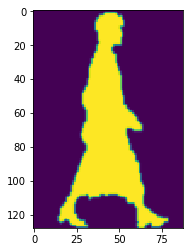

In [93]:
plt.imshow(imread(val_x[3500]))

In [2]:
name = '1f-Complete'
idx = 0
inputs = val_x
target = target_y

in_imgs = []
target_imgs = []
save_in_imgs = np.ndarray([64, 11*64], dtype=float)
save_target_imgs = np.ndarray([64, 11*64], dtype=float)

for ii, each in enumerate(inputs[3500 + 14000*idx:3511 + 14000*idx]):
    in_imgs.append(imresize(imread(each), [64,64], interp='nearest')/255.0)
    save_in_imgs[:, ii*64:ii*64 + 64] = imresize(imread(each), [64,64], interp='nearest')/255.0
    
for ii,each in enumerate(target[7000:7011]):
    target_imgs.append(imresize(imread(each), [64,64], interp='nearest')/255.0)
    save_target_imgs[:, ii*64:ii*64 + 64] = imresize(imread(each), [64,64], interp='nearest')/255.0
    
in_imgs = np.array(in_imgs)
target_imgs = np.array(target_imgs)

New_folder_path = './OULP-C1V2_Pack/Samples/End-to-End/{}'.format(name)
# os.makedirs(New_folder_path)

# plt.imshow(in_imgs[7])
# plt.savefig('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.eps'.format(name, 'in_single'), format='eps', dpi=1000)

# plt.imshow(target_imgs[7])
# plt.savefig('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.eps'.format(name, 'target_single'), format='eps', dpi=1000)
# plt.imshow(save_in_imgs)
imsave('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.png'.format(name, 'in_imgs'), save_in_imgs)
# plt.savefig('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.eps'.format(name, 'in_imgs'), format='eps', dpi=1000)
# plt.imshow(save_target_imgs)
# plt.savefig('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.eps'.format(name, 'target_imgs'), format='eps', dpi=1000)
imsave('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.png'.format(name, 'target_imgs'), save_target_imgs)

NameError: name 'val_x' is not defined

In [3]:
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/choosed/All-2_full_add_more_data_E2E_lr=6e-05_bs=80_nl=3_dim=128.ckpt'
in_imgs = np.reshape(in_imgs, [11, 64, 64, 1])
target_imgs = np.reshape(target_imgs, [11, 64, 64, 1])

with tf.Session(graph=loaded_graph) as sess:
        # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
    test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
    test_targets = loaded_graph.get_tensor_by_name('targets:0')
    test_training = loaded_graph.get_tensor_by_name('training:0')
    test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')
    test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
    test_MSE = loaded_graph.get_tensor_by_name('MSE:0')

    
    feed_dict = {test_inputs: in_imgs,
                         test_training: 1,
                         test_training:True
                        }
    
    test_decoded_img = sess.run(test_decoded, feed_dict=feed_dict)
    
    test_decoded_img = np.reshape(test_decoded_img, [11, 64,64])
    
    save_pred_imgs = np.ndarray([64, 11*64], dtype=float)
    
    for ii,each in enumerate(test_decoded_img):
        save_pred_imgs[:, ii*64:ii*64 + 64] = test_decoded_img[ii]
        
#     plt.imshow(test_decoded_img[7])
#     plt.savefig('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.eps'.format(name, 'pred_single'), format='eps', dpi=1000)
#     plt.imshow(save_pred_imgs)
#     plt.savefig('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.eps'.format(name, 'pred_imgs'), format='eps', dpi=1000)
    imsave('./OULP-C1V2_Pack/Samples/End-to-End/{}/{}.png'.format(name, 'pred_imgs'), save_pred_imgs)

NameError: name 'tf' is not defined

In [2]:
plt.imshow(imread('./OULP-C1V2_Pack/Samples/End-to-End/1f-Complete/target_imgs.eps'))

NameError: name 'plt' is not defined